In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

In [ ]:
from sklearn.datasets import fetch_california_housing
data_set = fetch_california_housing()
data = pd.DataFrame(data_set.data, columns = data_set.feature_names) # converting sklearn data_set to pandas dataframe
data['target'] = data_set.target
print(data_set.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


lets visualize the dataset and get a whole summary of it using **ydata_profiling** and calculate correlations to find best features

In [ ]:
!pip install ydata_profiling
import ydata_profiling
profile = ydata_profiling.ProfileReport(data)
profile.to_file('summary.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

from the summary we can realize, we can use **MedInc**, **AveRooms**, **AveOccup** features and if they were not enough, its fine to add **AveBedrms** and **Latitude**

but for now we need to take care of skewed variables (**AveOccup**, **AveRooms**, **AveBedrms**)

In [ ]:
# using standard deviation and mean to detect outliners
skewed_columns = ['AveOccup', 'AveRooms', 'AveBedrms', 'Population']
for column in skewed_columns:
    threshold = 2
    mean = data[column].mean()
    std = data[column].std()
    data[column] = data[((data[column] - mean) / std) <= threshold][column]
    data[column] = data[column].fillna(data[column].median()) # its better to fill NaN with median when we have a skewed variable

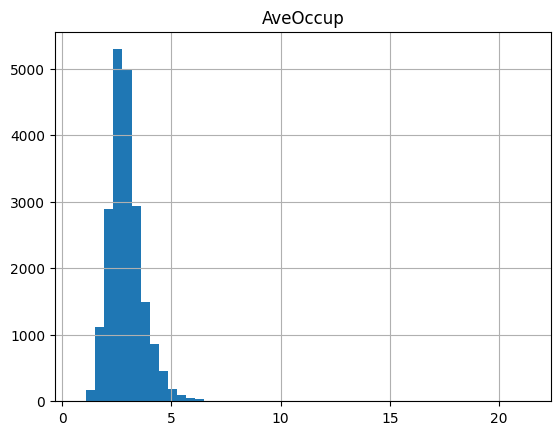

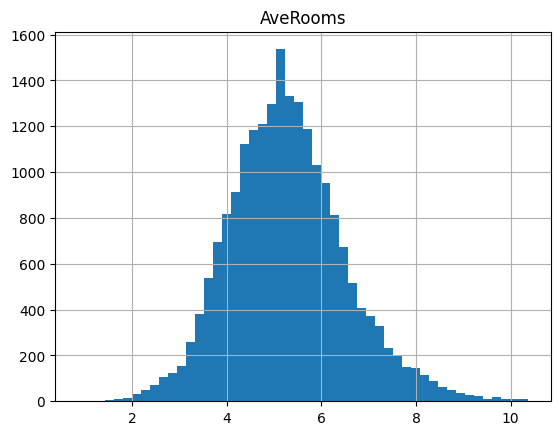

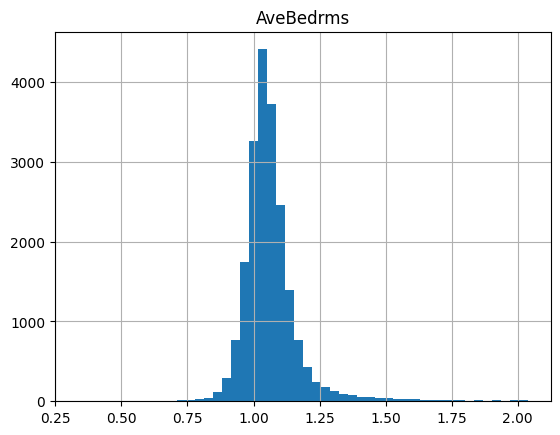

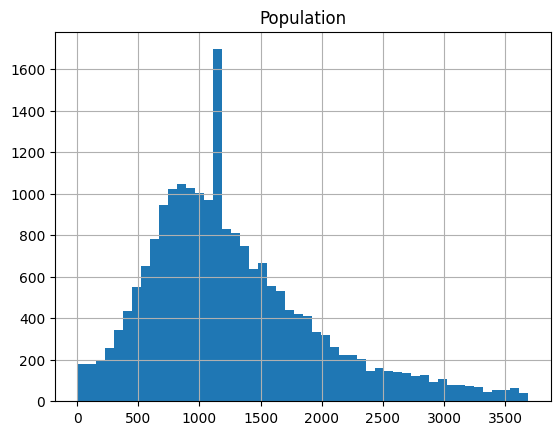

In [ ]:
# lets visualize these columns again
for column in skewed_columns:
    data[column].hist(bins = 50)
    plt.title(column)
    plt.show()

since we dont have outline values anymore we can user min-max scaler to normalize data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
data = pd.DataFrame(scaled_data, columns = data.columns)

In [ ]:
data # normalized data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,0.539668,0.784314,0.644114,0.404576,0.086520,0.090269,0.567481,0.211155,0.902266
1,0.538027,0.392157,0.565831,0.374149,0.650393,0.068676,0.565356,0.212151,0.708247
2,0.466028,1.000000,0.780956,0.433660,0.133713,0.102221,0.564293,0.210159,0.695051
3,0.354699,1.000000,0.521674,0.433433,0.150529,0.089900,0.564293,0.209163,0.672783
4,0.230776,1.000000,0.570418,0.438133,0.152427,0.072146,0.564293,0.209163,0.674638
...,...,...,...,...,...,...,...,...,...
20635,0.073130,0.470588,0.440671,0.468750,0.228370,0.090514,0.737513,0.324701,0.130105
20636,0.141853,0.333333,0.552807,0.575658,0.095742,0.117751,0.738576,0.312749,0.128043
20637,0.082764,0.313725,0.457471,0.460992,0.272308,0.079130,0.732200,0.311753,0.159383
20638,0.094295,0.333333,0.470480,0.491359,0.200163,0.069323,0.732200,0.301793,0.143713


now let's split the data to train and test and use the column that has been mentioned before to train the model with it

In [ ]:
best_features = ['MedInc', 'AveRooms', 'AveOccup', 'AveBedrms', 'Latitude']

train, test = train_test_split(data, test_size = 0.2)
xtrain = train[best_features]
ytrain = train['target']

xtest = test[best_features]
ytest = test['target']

Using linear regression(***dgree = 1***)

In [ ]:
# train
lr_1 = LinearRegression()
lr_1.fit(xtrain, ytrain)
# prediction to evaluate
yhat_train = lr_1.predict(xtrain)
yhat_test = lr_1.predict(xtest)
# evaluate using R2Score
print(r2_score(ytrain, yhat_train), r2_score(ytest, yhat_test))

0.5584478262294937 0.555014082136227


Using linear regression(***dgree = 2 to 6***)

In [ ]:
for d in range(2,7):
    poly = PolynomialFeatures(degree=d)
    x_poly = poly.fit_transform(xtrain)
    x_poly_test = poly.fit_transform(xtest)
    # train
    lr = LinearRegression()
    lr.fit(x_poly, ytrain)
    # prediction to evaluate
    yhat_train = lr.predict(x_poly)
    yhat_test = lr.predict(x_poly_test)
    # evaluate using R2Score
    print(f"model with dgree: {d} has train score: {r2_score(ytrain, yhat_train)} and test score: {r2_score(ytest, yhat_test)}")

model with dgree: 2 has train score: 0.6102205643913771 and test score: 0.6098954968777558
model with dgree: 3 has train score: 0.6431736126574081 and test score: 0.6389166422517263
model with dgree: 4 has train score: 0.6618136110975907 and test score: 0.6073492264223257
model with dgree: 5 has train score: 0.6784488587838309 and test score: -0.02177700627596213
model with dgree: 6 has train score: 0.6925206300693101 and test score: -15.275549526720827


As you can see the best dgree is 3 and after that model will overfit on data

Using DecisionTree model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(xtrain, ytrain)

yhat_train = tree_reg.predict(xtrain)
yhat_test = tree_reg.predict(xtest)
print(r2_score(ytrain, yhat_train), r2_score(ytest, yhat_test))

1.0 0.409737426545412


we can see a huge overfitting occurred in decision tree model and the cause is the complexity of model and the amount of data we have is small

# what if we use all the data we have?

In [ ]:

xtrain = train[data_set.feature_names]
ytrain = train['target']

xtest = test[data_set.feature_names]
ytest = test['target']
tree_reg = DecisionTreeRegressor()
tree_reg.fit(xtrain, ytrain)

yhat_train = tree_reg.predict(xtrain)
yhat_test = tree_reg.predict(xtest)
print(r2_score(ytrain, yhat_train), r2_score(ytest, yhat_test))

1.0 0.5977991115084693


finding the best parameters for Decision Tree model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

tree_reg = DecisionTreeRegressor()
gs = GridSearchCV(tree_reg, {'max_depth': list(range(2,10)), 'min_samples_split': list(range(2,10))}, cv = 5)
gs.fit(xtrain, ytrain)
print(gs.best_params_)



{'max_depth': 9, 'min_samples_split': 9}


In [ ]:
tree_reg = DecisionTreeRegressor(max_depth = 9, min_samples_split = 9)
tree_reg.fit(xtrain, ytrain)
yhat_train = tree_reg.predict(xtrain)
yhat_test = tree_reg.predict(xtest)
print(r2_score(ytrain, yhat_train), r2_score(ytest, yhat_test))

0.7929499427715193 0.6921940159037563


if the model is complex enough to learn all the patterns, we do not need to just use some columns to train the model, especially when we have just 8 columns in total

But we need to consider that if we use a complex model to be trained with a small amount of data, it can overfit **just like the decision tree**

Lets train linear regression with 2 to 6 degrees

In [ ]:
for d in range(2,7):
    poly = PolynomialFeatures(degree=d)
    x_poly = poly.fit_transform(xtrain)
    x_poly_test = poly.fit_transform(xtest)
    # train
    lr = LinearRegression()
    lr.fit(x_poly, ytrain)
    # prediction to evaluate
    yhat_train = lr.predict(x_poly)
    yhat_test = lr.predict(x_poly_test)
    # evaluate using R2Score
    print(f"model with dgree: {d} has train score: {r2_score(ytrain, yhat_train)} and test score: {r2_score(ytest, yhat_test)}")

model with dgree: 2 has train score: 0.7124812321634011 and test score: 0.7115962905935194
model with dgree: 3 has train score: 0.7517920599919309 and test score: 0.7348352504861466
model with dgree: 4 has train score: 0.7898710525644841 and test score: 0.6732329449109853
model with dgree: 5 has train score: 0.827120268499141 and test score: 0.12912248313697028
model with dgree: 6 has train score: 0.8649354005698344 and test score: -1840.160824684305


we have a good score with dgree 3

lets use the random forest model just in case to eliminate the desicion tree model bias

finding the best parameters for Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

forest_reg = RandomForestRegressor()
gs = GridSearchCV(forest_reg, {'n_estimators': [100,150,200,250],'max_depth': [2,3,4], 'min_samples_split': [2,3]}, cv = 5)
gs.fit(xtrain, ytrain)
print(gs.best_params_)

{'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 250}


In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(max_depth = 4, min_samples_split = 2, n_estimators = 250)
forest_reg.fit(xtrain, ytrain)

yhat_train = tree_reg.predict(xtrain)
yhat_test = tree_reg.predict(xtest)

print(r2_score(ytrain, yhat_train), r2_score(ytest, yhat_test))

0.7929499427715193 0.6921940159037563


using KNN regression

In [ ]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsRegressor()
gs = GridSearchCV(knn, {'n_neighbors':list(range(1,50))}, cv = 5)
gs.fit(xtrain, ytrain)
print(gs.best_params_)


{'n_neighbors': 10}


In [ ]:
knn = KNeighborsRegressor(10)
knn.fit(xtrain, ytrain)

yhat_train = tree_reg.predict(xtrain)
yhat_test = tree_reg.predict(xtest)

print(r2_score(ytrain, yhat_train), r2_score(ytest, yhat_test))

1.0 0.5977991115084693


At last, lets use SVR with rbf kernel

In [ ]:
from sklearn.svm import SVR
svr = SVR()
gs = GridSearchCV(svr, {'kernel':['rbf'], 'gamma': [0.01, 0.1, 1, 10], 'C': [0.1, 1, 10]}, cv = 5)
gs.fit(xtrain, ytrain)
print(gs.best_params_)

In [ ]:
svr = SVR(C= 1, gamma= 10, kernel= 'rbf')
svr.fit(xtrain, ytrain)

yhat_train = svr.predict(xtrain)
yhat_test = svr.predict(xtest)

print(r2_score(ytrain, yhat_train), r2_score(ytest, yhat_test))

0.8231440535989452 0.7695693931994281


#in conclusion, the best model is a SVR with the whole data set with C = 1 & gamma = 10 with rbf kernel
#but it's important that without normalization and removing outliners, we coudnt get good results